In [1]:
%load_ext autoreload
%autoreload 2

from algorithms.envs.NCS.cacc_env import CACCEnv
import configparser

input: action

output: state reward, done, global_reward

8 vehicles

([v_state, vdiff_state, vhdiff_state, h_state, u_state])

v-v_star/v_star, v difference from car', vhdiff, distance from car', acceleration

code for vhdiff:
        vh = self.ovm.get_vh(self.hs_cur[i_veh])
        vhdiff_state = np.clip((vh - self.vs_cur[i_veh]) / VDIFF, -2, 2)
basically it tells the agent what vh is. 

At first all cars dirve at optiaml v, The first car is guided by its headway... 

 here we train NMARL to recommend appropriate (α◦
, β◦) for
each OVM controller, selected from four levels {(0, 0),(0.5, 0),(0, 0.5),(0.5, 0.5)}

For both CACC tasks, we simulate a string of 8 vehicles for 60s, with a 0.1s
control interval. Each vehicle observes and shares its headway h, velocity v, and acceleration a to
neighbors within two steps. The safety constraints are: h ≥ 1m, v ≤ 30m/s, |a| ≤ 2.5m/s2
.
Both v and h are normalized

alpha: weight of headway
beta: weight of target speed (for all following cars, set as the speed of the car before)
for the first car, it is always v_star in the code

runs for 600 frames, 60s sec * 10 per sec

collision yields -1000*8, while the initial reward is -170, -1600 before collision
let all cars take action 1 for a collision
I am worried if -8000 is a good solution compared with -170*(1/(1-gamma))...

# Initialize Env from Scratch

In [2]:
import numpy as np
output_path = '/tmp/'
config_path = 'algorithms/envs/NCS/config/config_ma2c_nc_catchup.ini'
config = configparser.ConfigParser()
config.read(config_path)

['algorithms/envs/NCS/config/config_ma2c_nc_catchup.ini']

In [3]:

env = CACCEnv(config['ENV_CONFIG'])
env.init_data(True, False, output_path)
ob = env.reset()
length = 0
while True:
    ob, reward, done, _ = env.step(np.array([1]*(env.n_agent)))
    length += 1
    print(reward)
    if done:
        break
result = env.output_data()
print(length)


[-1.85454261e+02 -1.56250000e-04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
[-1.84623700e+02 -2.50569578e-03 -2.40957001e-09 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
[-1.83245682e+02 -1.27533091e-02 -1.16288277e-07 -3.71585974e-14
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
[-1.81329582e+02 -4.04135384e-02 -1.57782589e-06 -3.63576040e-12
 -5.73029866e-19 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
[-1.78888525e+02 -9.86129379e-02 -1.12261552e-05 -9.59753360e-11
 -9.44279481e-17 -8.84242393e-24 -0.00000000e+00 -0.00000000e+00]
[-1.75939385e+02 -2.03811730e-01 -5.39056509e-05 -1.24815557e-09
 -4.11419348e-15 -2.20114670e-21 -1.13595970e-28 -0.00000000e+00]
[-1.72502789e+02 -3.75459792e-01 -1.98622007e-04 -1.02777560e-08
 -8.56927849e-14 -1.43255618e-19 -4.69656229e-26 -0.00000000e+00]
[-1.68603110e+02 -6.35593683e-01 -6.04860905e-04 -6.13690266e-08
 -1.09252095e-12 -

# Use Env Config and Wrapper

In [5]:
from algorithms.envs.CACC import env_name, env_fn

SyntaxError: invalid syntax (<ipython-input-5-00fb69713368>, line 1)

In [5]:
env = env_fn()
env.reset()
state, reward, done, info = env.step([1]*8)

NameError: name 'env_fn' is not defined

In [ ]:
from gym.spaces import Box

# Visualization

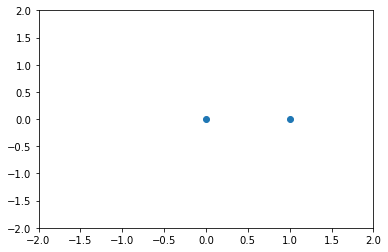

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -2, 2))
ax.set_ylim((-2, 2))

scatter = ax.scatter([0, 1], [0, 0])
ob = env.reset()

In [ ]:
h_star = 20


# initialization function: plot the background of each frame
def init():
    ob = env.reset()
    xs = []
    ys = [0]*8
    tmp = 0
    for i, item in enumerate(ob):
        tmp -= item[-2]*h_star + h_star
        xs += [tmp]
    colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'black']
    scatter = ax.scatter(xs, ys, c=colors)
    return (scatter,)

# animation function. This is called sequentially

def animate(i):
    ob, _, done, _ = env.step([1]*(env.n_agent))
    if done:
        print(i, done)
    tmp = 0
    xs = []
    ys = [0]*8
    for i, item in enumerate(ob):
        tmp -= item[-2]* h_star + h_star
        xs += [tmp]
    ax.clear()
    ax.set_xlim(( -190, 0))
    ax.set_ylim((-2, 2))
    colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'black']
    scatter = ax.scatter(xs, ys, c=colors)
    return (scatter,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=599, interval=100, blit=True)
HTML(anim.to_html5_video())

In [ ]:
anim.save("tmp.mp4")

# Slowdown

In [ ]:
import numpy as np
output_path = '/tmp/'
config_path = 'algorithms/envs/NCS/config/config_ma2c_nc_slowdown.ini'
config = configparser.ConfigParser()
config.read(config_path)

In [ ]:
env = CACCEnv(config['ENV_CONFIG'])
env.init_data(True, False, output_path)
ob = env.reset()
length = 0
while True:
    ob, reward, done, _ = env.step(np.array([1]*(env.n_agent)))
    length += 1
    print(reward)
    if done:
        break
result = env.output_data()
print(length)


In [1]:
import numpy as np

In [2]:
x= np.zeros(1)

In [4]:
x.tolist()

[0.0]